In [426]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [427]:
Can we predict who would've survived the Titanic?

Object `Titanic` not found.


In [ ]:
Can we predict who would've survived the Titanic

In [ ]:
Can we predict who would've survived the Titanic

In [ ]:
Can we predict who would've survived the Titanic

Can we predict who would've survived the Titanic

Can we predict who would've survived the Titanic

# Import Dependencies

In [458]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

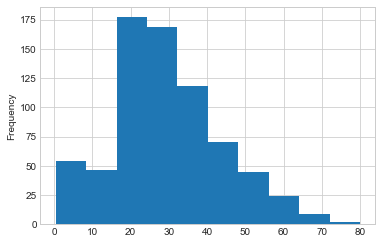

In [459]:
train.Age.plot.hist()

In [460]:
# loading the data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
gender_submission = pd.read_csv("gender_submission.csv") # example of what a submission should look like

In [461]:
len(train)

891

In [462]:
#View the training data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [352]:
len(test)

418

In [353]:
test.head() # head = view first 5 lines 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [354]:
#View the example submission dataframe
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


Data Descriptions:
Survival:0 = No, 1=yES
pclass(Ticket class: 1=1st, 2=2nd, 3=3RD
sex: Sex
Age: Age in years
sibsp: number of siblings/spouses aboard the Titanic
parch: number of parents/children aboard the Titanic
ticket: Ticket number
fare: Passenger fare
cabin: Cabin number
embarked:Port of Embarkation, C=Cherbourg, Q=Queenstown, S=Southampton

In [355]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<br> What missing values are there?
Where are the holes in our data?

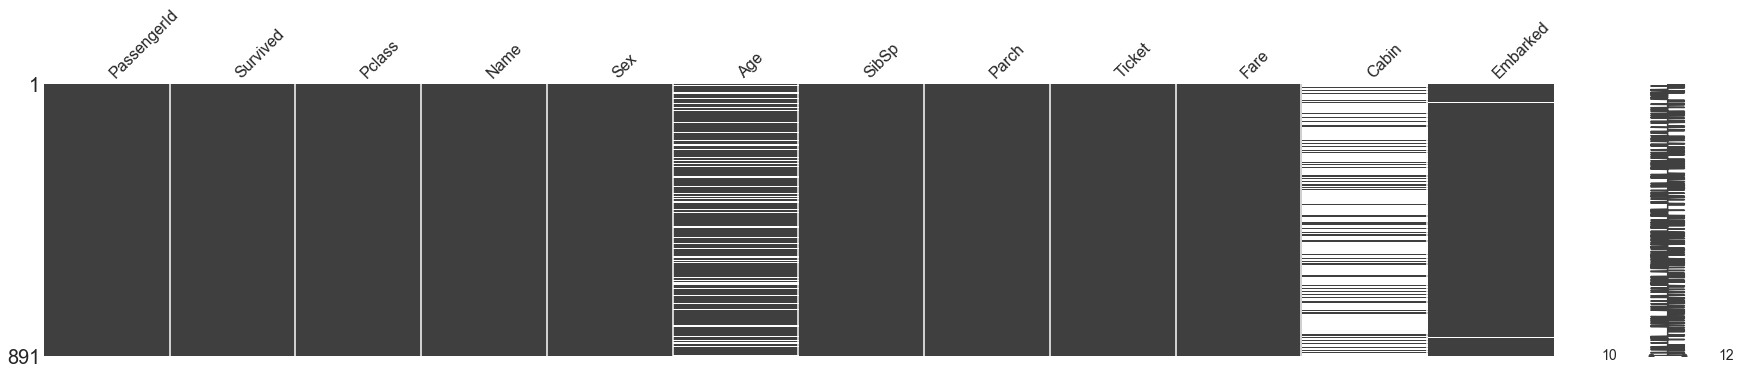

In [356]:
missingno.matrix(train, figsize = (30, 5))

In [465]:
#Alternatively, you can see the number of missing values like this
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Create two new dataframe

In [466]:
df_bin = pd.DataFrame() # for dioscretised continous variables
df_con = pd.DataFrame() # for continous variables 

In [467]:
#Different data types in the dataset
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

0    549
1    342
Name: Survived, dtype: int64


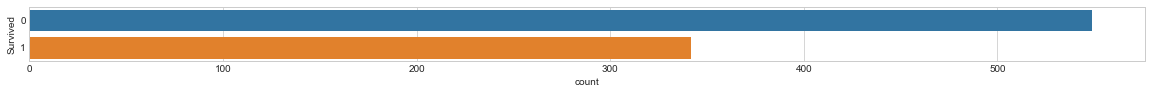

In [468]:
#How many people survived?
fig = plt.figure(figsize = (20,1))
sns.countplot(y='Survived', data=train);
print(train.Survived.value_counts())  

In [469]:
#Add this to subset dataframes
df_bin['Survived'] = train['Survived']
df_con['Survived'] = train['Survived']

In [471]:
df_bin.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [472]:
df_con.head()

,Survived
0,0
1,1
2,1
3,1
4,0


Feature:Pclass
Description: The ticket class of the passange
Key: 1=1st, 2=2nd, 3=3rd

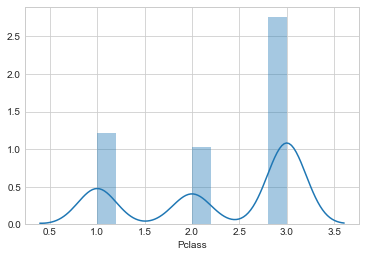

In [473]:
sns.distplot(train.Pclass)

In [362]:
# How many missing variables does Pclass have?
train.Pclass.isnull().sum()

0

Feature:Name

In [474]:
df_bin['Pclass'] = train['Pclass']
df_con['Pclass'] = train['Pclass']

In [475]:
# How many different names are there?
train.Name.value_counts()

Goodwin, Mrs. Frederick (Augusta Tyler)    1
Farthing, Mr. John                         1
Horgan, Mr. John                           1
Cacic, Miss. Marija                        1
Razi, Mr. Raihed                           1
                                          ..
Kilgannon, Mr. Thomas J                    1
Coleff, Mr. Peju                           1
Laroche, Mr. Joseph Philippe Lemercier     1
Baclini, Mrs. Solomon (Latifa Qurban)      1
Mitchell, Mr. Henry Michael                1
Name: Name, Length: 891, dtype: int64

In [365]:
df_con.head()

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3


Feature:Name
Description: The name of the passager

Feature: Sex
Description: The sex of the passager (male or female)

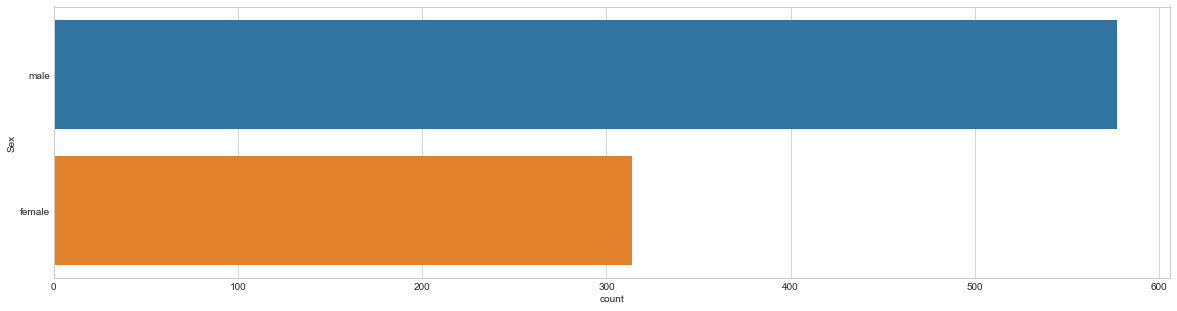

In [476]:
#View the distribution of Sex
plt.figure(figsize=(20, 5))
sns.countplot(y="Sex", data=train)

In [477]:
train.Sex.head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [478]:
# add Sex to the subset dataframes
df_bin['Sex'] = train['Sex']
df_bin['Sex'] = np.where(df_bin['Sex'] == 'female', 1, 0)
df_con['Sex'] = train['Sex']

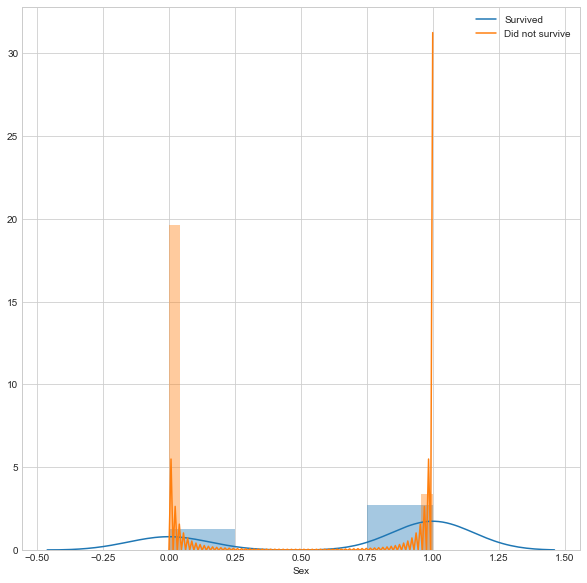

In [479]:
#How does the Sex variable look compared to survival?
#We can see this becaure they'are both binarys
fig = plt.figure(figsize=(10, 10))
sns.distplot(df_bin.loc[df_bin['Survived'] == 1]['Sex'], kde_kws = {'label':'Survived'});
sns.distplot(df_bin.loc[df_bin['Survived'] == 0]['Sex'], kde_kws = {'label':'Did not survive'});

In [480]:
#How many missing values does age have?
train.Age.isnull().sum()

177

Feature: Age

In [481]:
def plot_count_dist(data, bin_df, label_column, target_column, figsize=(20, 5), use_bin_df=False):
    """
    Function to plot counts and distributions of a label variable and 
    target variable side by side.
    ::param_data:: = target dataframe
    ::param_bin_df:: = binned dataframe for countplot
    ::param_label_column:: = binary labelled column
    ::param_target_column:: = column you want to view counts and distributions
    ::param_figsize:: = size of figure (width, height)
    ::param_use_bin_df:: = whether or not to use the bin_df, default False
    """
    if use_bin_df: 
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=bin_df);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});
    else:
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=data);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});

Feature: SubSp
Description: The number of siblings/spouses the passenger has aboard the Titanic

In [482]:
#How values are there?
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [483]:
# Add SibSp to subset dataframes
df_bin['SibSp'] = train['SibSp']
df_con['SibSp'] = train['SibSp']

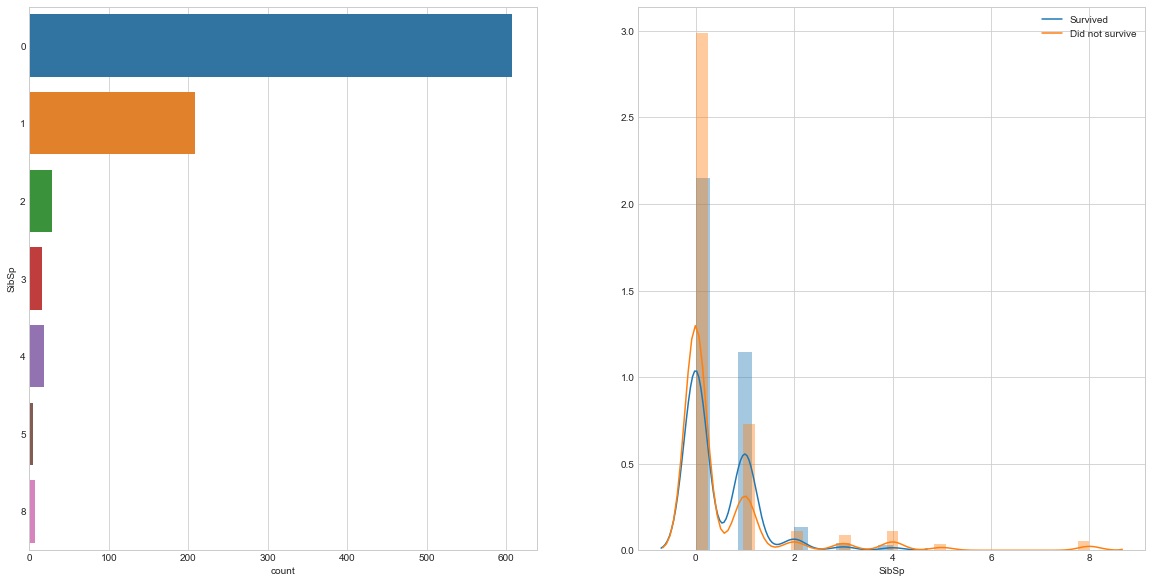

In [484]:
# Visualise the counts of SibSp and the distribution of the values
# against Survived
plot_count_dist(train, 
                bin_df=df_bin, 
                label_column='Survived', 
                target_column='SibSp', 
                figsize=(20, 10))

Feature: Parch
Description: The number of parents/children the passenger has aboard the Titanic

In [485]:
# How many missing values does Parch have?
train.Parch.isnull().sum()

0

In [486]:
# What values are there?
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [487]:
# Add Parch to subset dataframes
df_bin['Parch'] = train['Parch']
df_con['Parch'] = train['Parch']

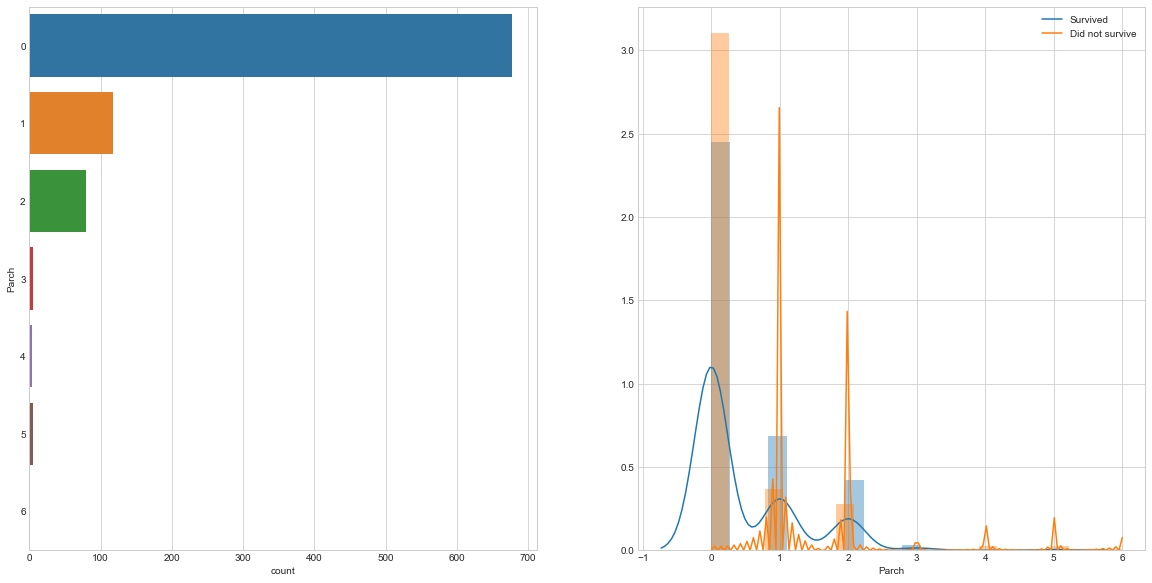

In [488]:
# Visualise the counts of Parch and the distribution of the values
# against Survived
plot_count_dist(train, 
                bin_df=df_bin,
                label_column='Survived', 
                target_column='Parch', 
                figsize=(20, 10))

In [378]:
df_bin['Parch'] = train['Parch']
df_con['Parch'] = train['Parch']

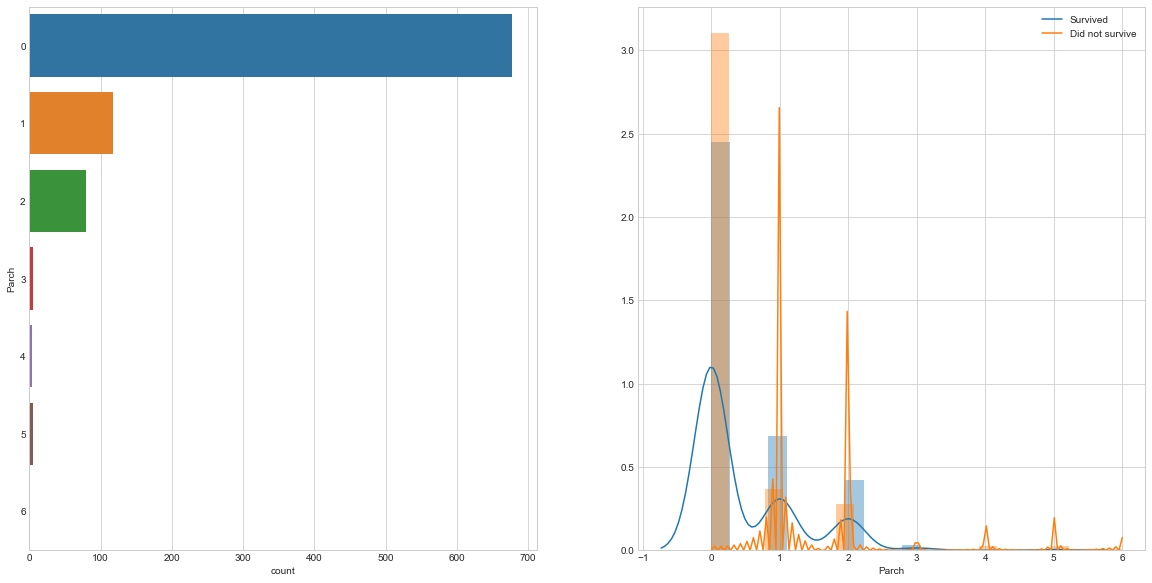

In [379]:
#Visualize the counts of Parch and the distrribution of the values
#against Survived
plot_count_dist(train,
               bin_df=df_bin,
               label_column = "Survived",
               target_column = "Parch",
               figsize = (20, 10))

In [489]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [490]:
df_con.head()

,Survived,Pclass,Sex,SibSp,Parch
0,0,3,male,1,0
1,1,1,female,1,0
2,1,3,female,0,0
3,1,1,female,1,0
4,0,3,male,0,0


Feature: ticket

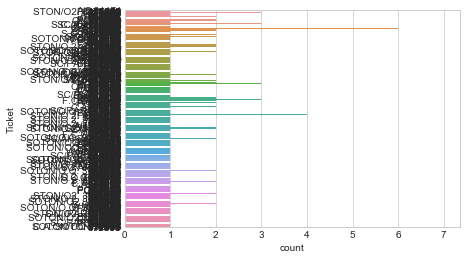

In [491]:
sns.countplot(y="Ticket", data=train)

In [492]:
train.Ticket.value_counts()

347082               7
1601                 7
CA. 2343             7
3101295              6
347088               6
                    ..
345767               1
113043               1
11771                1
STON/O 2. 3101275    1
2700                 1
Name: Ticket, Length: 681, dtype: int64

In [493]:
#How many unique kinds of Ticket are there?
print("There are {} unique Ticket values.".format(len(train.Ticket.unique())))

There are 681 unique Ticket values.


Feature: fare

In [383]:
train.Fare.dtype

dtype('float64')

In [494]:
#How many missing values does Fare have?
train.Fare.isnull().sum()

0

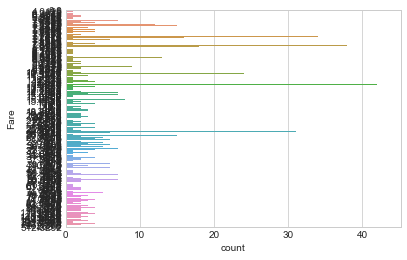

In [495]:
#How many different values of Fare are there?
sns.countplot(y="Fare", data=train);

In [384]:
#How many unique kinds of Fare are there?
print("There are {} unique Fare values".format(len(train.Fare.unique())))

There are 248 unique Fare values


In [496]:
#Add Fare to sub dataframes
df_con['Fare'] = train['Fare'] # discretised
df_bin['Fare'] = pd.cut(train['Fare'], 5)

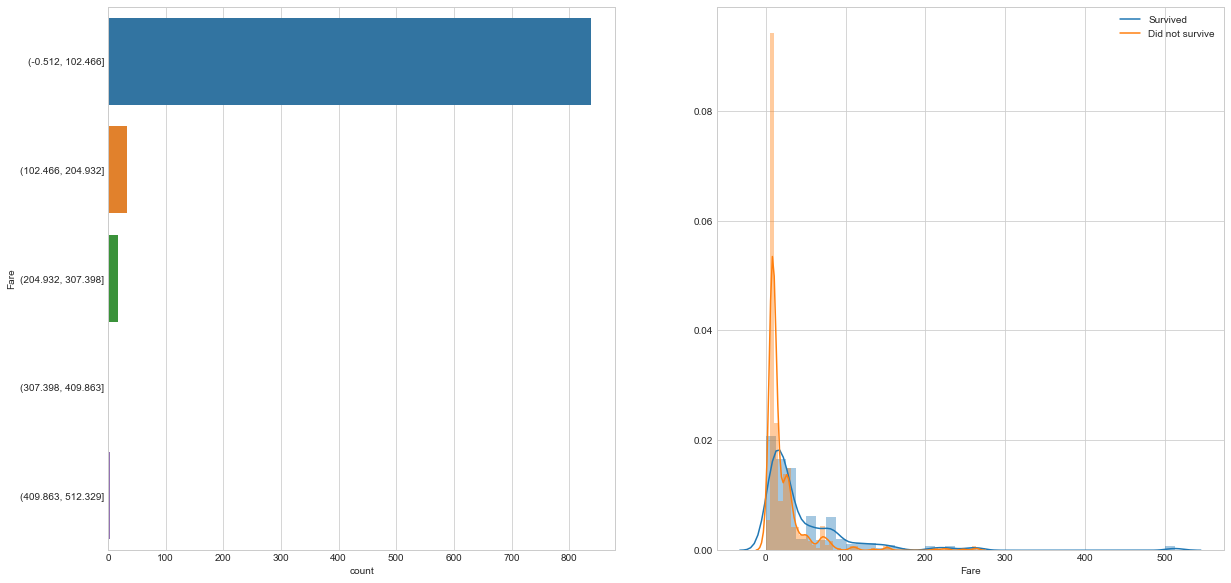

In [497]:
#Visualize the Fare bin counts as well as teh Fare distribution versus Survived.
plot_count_dist(data=train,
               bin_df = df_bin,
               label_column="Survived",
               target_column = "Fare",
               figsize = (20, 10),
               use_bin_df =True)

Feature: Cabin
Description: The cabin number where the passanger was staying

In [501]:
#How many missing values does Cabin have?
train.Cabin.isnull().sum()

687

Feature:Embarked

train.Cabin.value_counts()

In [502]:
#How many missingvalues does Embarked have?
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

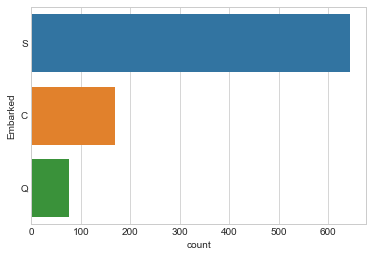

In [503]:
#What do the counts look like?
sns.countplot(y="Embarked", data=train);

In [504]:
# Add Embarked to sub dataframes
df_bin['Embarked'] = train['Embarked']
df_con['Embarked'] = train['Embarked']

In [505]:
#Reabsmove Embarked rows which are missing valuesprint(len(df_con))
print(len(df_con))
df_con = df_con.dropna(subset = ['Embarked'])
df_bin = df_bin.dropna(subset = ['Embarked'])
print(len(df_con))

891
889


Feature encoding

In [506]:
df_bin.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,"(-0.512, 102.466]",S
1,1,1,1,1,0,"(-0.512, 102.466]",C
2,1,3,1,0,0,"(-0.512, 102.466]",S
3,1,1,1,1,0,"(-0.512, 102.466]",S
4,0,3,0,0,0,"(-0.512, 102.466]",S


df_bin.head()

In [507]:
# One-hot encode binned variables
one_hot_cols = df_bin.columns.tolist()
one_hot_cols.remove('Survived')
df_bin_enc = pd.get_dummies(df_bin, columns=one_hot_cols)

df_bin_enc.head()

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Parch_5,Parch_6,"Fare_(-0.512, 102.466]","Fare_(102.466, 204.932]","Fare_(204.932, 307.398]","Fare_(307.398, 409.863]","Fare_(409.863, 512.329]",Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,1,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1,0,0,1,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,1,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [508]:
df_con.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S


In [394]:
# Label Encode all continuous values using LabelEncoder()
df_con_enc = df_con.apply(LabelEncoder().fit_transform)
df_con_enc.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,2,1,1,0,18,2
1,1,0,0,1,0,207,0
2,1,2,0,0,0,41,2
3,1,0,0,1,0,189,2
4,0,2,1,0,0,43,2


In [509]:
# One hot encode the categorical columns
df_embarked_one_hot = pd.get_dummies(df_con['Embarked'], 
                                     prefix='embarked')

df_sex_one_hot = pd.get_dummies(df_con['Sex'], 
                                prefix='sex')

df_plcass_one_hot = pd.get_dummies(df_con['Pclass'], 
                                   prefix='pclass')

In [510]:
# Combine the one hot encoded columns with df_con_enc
df_con_enc = pd.concat([df_con, 
                        df_embarked_one_hot, 
                        df_sex_one_hot, 
                        df_plcass_one_hot], axis=1)

# Drop the original categorical columns (because now they've been one hot encoded)
df_con_enc = df_con_enc.drop(['Pclass', 'Sex', 'Embarked'], axis=1)

Start Building Machine Learning Models

In [511]:
# Let's look at df_con_enc
df_con_enc.head(20)

,Survived,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,0,8.0500,0,0,1,0,1,0,0,1
5,0,0,0,8.4583,0,1,0,0,1,0,0,1
6,0,0,0,51.8625,0,0,1,0,1,1,0,0
7,0,3,1,21.0750,0,0,1,0,1,0,0,1
8,1,0,2,11.1333,0,0,1,1,0,0,0,1
9,1,1,0,30.0708,1,0,0,1,0,0,1,0


Start Building Machine Learning Models

In [512]:
#Select the dataframe we want to use first for predictions
selected_df = df_con_enc

In [513]:
selected_df.head()

,Survived,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,0,8.0500,0,0,1,0,1,0,0,1


In [514]:
#Split the dataframe into data and labels
X_train = selected_df.drop('Survived', axis=1) #data
y_train = selected_df.Survived #labels

In [515]:
# Shape of the data (without labels)
X_train.shape

(889, 11)

In [516]:
X_train.head()

,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,0,71.2833,1,0,0,1,0,1,0,0
2,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,8.0500,0,0,1,0,1,0,0,1


In [517]:
#Shape of the labels
y_train.shape

(889,)

Define the function to fit machine learning algorithms
Since many of the algorithms we will use are from the sklearn library; they all take similar (practically the same) inputs and produce similar outputs. To prevent writing code multiple times, we will functionise fitting and returing the accuracy scores.

In [518]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

Logistic Regression

In [519]:
# Logistic Regression
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 79.98
Accuracy CV 10-Fold: 79.42
Running Time: 0:00:17.005714


K-nearest Neighbors

In [520]:
#K-Nearest Regression
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(),
                                                 X_train,
                                                 y_train,
                                                 10)
knn_time = (time.time()-start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" %acc_cv_knn)
print("Runnuing Time: %s" % datetime.timedelta(seconds = knn_time))

Accuracy: 83.46
Accuracy CV 10-Fold: 76.72
Runnuing Time: 0:00:00.747035


Gaussian Naive Bayes

In [521]:
#Gaussian Navie Bayes
start_time = time.time()
strain_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(), 
                                                                 X_train,
                                                                 y_train,
                                                                 10)
gaussian_time = (time.time()-start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds = gaussian_time))

Accuracy: 78.52
Accuracy CV 10-Fold: 77.95
Running Time: 0:00:00.291253


Linear Support Vector Machines (SVC)

In [522]:
#linear SVC
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),
                                                                X_train,
                                                                y_train,
                                                                10)
linear_svc_time = (time.time()-start_time)
print ("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds = linear_svc_time))

Accuracy: 78.52
Accuracy CV 10-Fold: 77.28
Running Time: 0:00:00.230385


Stochastic Gradient Descent 

In [523]:
# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(), 
                                                  X_train, 
                                                  y_train,
                                                  10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 77.5
Accuracy CV 10-Fold: 70.87
Running Time: 0:00:00.212462


Decision Tree Classsifier 

In [524]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(),
                                              X_train,
                                              y_train,
                                              10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Runnning time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 92.46
Accuracy CV 10-Fold: 80.09
Runnning time: 0:00:00.409933


Gradient Boost Trees

In [525]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       X_train, 
                                                                       y_train,
                                                                       10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 86.61
Accuracy CV 10-Fold: 80.65
Running Time: 0:00:02.026822


CatBoost Algorithm

In [526]:
#View the data for the CatBiist ndel
X_train.head()

,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,0,71.2833,1,0,0,1,0,1,0,0
2,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,8.0500,0,0,1,0,1,0,0,1


In [527]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [528]:
#Define the categorical features for the CatBoost model
cat_features = np.where(X_train.dtypes != np.float)[0]
cat_features

array([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [529]:
# Use the CatBoost Pool() function to pool together the training data and categoricakl featyre labels
train_pool = Pool(X_train,
                 y_train,
                 cat_features)

In [530]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [531]:
#CatBoost model definition
catboost_model = CatBoostClassifier(iterations = 1000,
                                    custom_loss = ['Accuracy'],
                                    loss_function = 'Logloss')
#Fit CatBoost model
catboost_model.fit(train_pool,
                  plot=True)
#CatBoost accuracy
acc_catboost= round(catboost_model.score(X_train, y_train)*100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.016206
0:	learn: 0.6818450	total: 42.6ms	remaining: 42.5s
1:	learn: 0.6759072	total: 53.7ms	remaining: 26.8s
2:	learn: 0.6673021	total: 69.3ms	remaining: 23s
3:	learn: 0.6588371	total: 81.3ms	remaining: 20.3s
4:	learn: 0.6509958	total: 100ms	remaining: 20s
5:	learn: 0.6426722	total: 111ms	remaining: 18.4s
6:	learn: 0.6353671	total: 120ms	remaining: 17s
7:	learn: 0.6278300	total: 156ms	remaining: 19.3s
8:	learn: 0.6199946	total: 177ms	remaining: 19.5s
9:	learn: 0.6157245	total: 179ms	remaining: 17.7s
10:	learn: 0.6093044	total: 181ms	remaining: 16.3s
11:	learn: 0.6019208	total: 190ms	remaining: 15.6s
12:	learn: 0.5944882	total: 196ms	remaining: 14.9s
13:	learn: 0.5880221	total: 210ms	remaining: 14.8s
14:	learn: 0.5837337	total: 215ms	remaining: 14.1s
15:	learn: 0.5777183	total: 221ms	remaining: 13.6s
16:	learn: 0.5724198	total: 223ms	remaining: 12.9s
17:	learn: 0.5670410	total: 263ms	remaining: 14.3s
18:	learn: 0.5619492	total: 274ms	remaining: 14.1s
19:	learn: 0.

175:	learn: 0.3977840	total: 1.59s	remaining: 7.46s
176:	learn: 0.3977546	total: 1.59s	remaining: 7.41s
177:	learn: 0.3973830	total: 1.61s	remaining: 7.45s
178:	learn: 0.3973563	total: 1.62s	remaining: 7.42s
179:	learn: 0.3972078	total: 1.64s	remaining: 7.47s
180:	learn: 0.3969259	total: 1.67s	remaining: 7.54s
181:	learn: 0.3967835	total: 1.67s	remaining: 7.53s
182:	learn: 0.3966142	total: 1.68s	remaining: 7.49s
183:	learn: 0.3961636	total: 1.69s	remaining: 7.5s
184:	learn: 0.3960782	total: 1.69s	remaining: 7.46s
185:	learn: 0.3960695	total: 1.7s	remaining: 7.42s
186:	learn: 0.3957027	total: 1.71s	remaining: 7.44s
187:	learn: 0.3956815	total: 1.71s	remaining: 7.4s
188:	learn: 0.3952997	total: 1.72s	remaining: 7.39s
189:	learn: 0.3947855	total: 1.73s	remaining: 7.37s
190:	learn: 0.3946791	total: 1.74s	remaining: 7.37s
191:	learn: 0.3943906	total: 1.74s	remaining: 7.34s
192:	learn: 0.3941278	total: 1.75s	remaining: 7.32s
193:	learn: 0.3940212	total: 1.75s	remaining: 7.29s
194:	learn: 0.3

338:	learn: 0.3711676	total: 2.96s	remaining: 5.76s
339:	learn: 0.3708744	total: 2.97s	remaining: 5.77s
340:	learn: 0.3708059	total: 2.99s	remaining: 5.78s
341:	learn: 0.3707989	total: 3s	remaining: 5.76s
342:	learn: 0.3706265	total: 3s	remaining: 5.75s
343:	learn: 0.3705662	total: 3.02s	remaining: 5.76s
344:	learn: 0.3702255	total: 3.02s	remaining: 5.74s
345:	learn: 0.3700147	total: 3.04s	remaining: 5.75s
346:	learn: 0.3700076	total: 3.04s	remaining: 5.72s
347:	learn: 0.3698171	total: 3.06s	remaining: 5.72s
348:	learn: 0.3698109	total: 3.06s	remaining: 5.71s
349:	learn: 0.3697021	total: 3.06s	remaining: 5.69s
350:	learn: 0.3697021	total: 3.06s	remaining: 5.67s
351:	learn: 0.3694261	total: 3.07s	remaining: 5.64s
352:	learn: 0.3692587	total: 3.07s	remaining: 5.62s
353:	learn: 0.3691397	total: 3.08s	remaining: 5.62s
354:	learn: 0.3691397	total: 3.08s	remaining: 5.59s
355:	learn: 0.3689623	total: 3.09s	remaining: 5.59s
356:	learn: 0.3689522	total: 3.09s	remaining: 5.57s
357:	learn: 0.3687

502:	learn: 0.3530748	total: 4.54s	remaining: 4.49s
503:	learn: 0.3529193	total: 4.55s	remaining: 4.47s
504:	learn: 0.3528423	total: 4.56s	remaining: 4.47s
505:	learn: 0.3528165	total: 4.57s	remaining: 4.46s
506:	learn: 0.3526198	total: 4.58s	remaining: 4.45s
507:	learn: 0.3522514	total: 4.59s	remaining: 4.45s
508:	learn: 0.3521316	total: 4.6s	remaining: 4.44s
509:	learn: 0.3520245	total: 4.62s	remaining: 4.43s
510:	learn: 0.3519534	total: 4.62s	remaining: 4.42s
511:	learn: 0.3518235	total: 4.63s	remaining: 4.41s
512:	learn: 0.3517195	total: 4.65s	remaining: 4.41s
513:	learn: 0.3516874	total: 4.65s	remaining: 4.4s
514:	learn: 0.3516119	total: 4.66s	remaining: 4.38s
515:	learn: 0.3514946	total: 4.66s	remaining: 4.37s
516:	learn: 0.3511432	total: 4.68s	remaining: 4.38s
517:	learn: 0.3509660	total: 4.7s	remaining: 4.37s
518:	learn: 0.3508359	total: 4.72s	remaining: 4.38s
519:	learn: 0.3507514	total: 4.73s	remaining: 4.36s
520:	learn: 0.3506303	total: 4.74s	remaining: 4.36s
521:	learn: 0.3

664:	learn: 0.3324768	total: 6.83s	remaining: 3.44s
665:	learn: 0.3322894	total: 6.85s	remaining: 3.43s
666:	learn: 0.3321164	total: 6.87s	remaining: 3.43s
667:	learn: 0.3319005	total: 6.88s	remaining: 3.42s
668:	learn: 0.3318244	total: 6.9s	remaining: 3.41s
669:	learn: 0.3316881	total: 6.91s	remaining: 3.4s
670:	learn: 0.3314403	total: 6.92s	remaining: 3.39s
671:	learn: 0.3314350	total: 6.93s	remaining: 3.38s
672:	learn: 0.3311823	total: 6.93s	remaining: 3.37s
673:	learn: 0.3307608	total: 6.95s	remaining: 3.36s
674:	learn: 0.3304914	total: 6.96s	remaining: 3.35s
675:	learn: 0.3303688	total: 6.98s	remaining: 3.35s
676:	learn: 0.3300493	total: 7s	remaining: 3.34s
677:	learn: 0.3297623	total: 7s	remaining: 3.32s
678:	learn: 0.3295694	total: 7.02s	remaining: 3.32s
679:	learn: 0.3295432	total: 7.02s	remaining: 3.3s
680:	learn: 0.3293542	total: 7.04s	remaining: 3.3s
681:	learn: 0.3292310	total: 7.05s	remaining: 3.29s
682:	learn: 0.3288891	total: 7.08s	remaining: 3.29s
683:	learn: 0.3288278	

834:	learn: 0.3091644	total: 9.41s	remaining: 1.86s
835:	learn: 0.3090513	total: 9.42s	remaining: 1.85s
836:	learn: 0.3089491	total: 9.44s	remaining: 1.84s
837:	learn: 0.3087397	total: 9.45s	remaining: 1.83s
838:	learn: 0.3085640	total: 9.46s	remaining: 1.82s
839:	learn: 0.3083672	total: 9.49s	remaining: 1.81s
840:	learn: 0.3082523	total: 9.51s	remaining: 1.8s
841:	learn: 0.3080834	total: 9.52s	remaining: 1.78s
842:	learn: 0.3080736	total: 9.54s	remaining: 1.78s
843:	learn: 0.3079312	total: 9.56s	remaining: 1.77s
844:	learn: 0.3077964	total: 9.57s	remaining: 1.75s
845:	learn: 0.3077482	total: 9.59s	remaining: 1.75s
846:	learn: 0.3076331	total: 9.61s	remaining: 1.74s
847:	learn: 0.3075775	total: 9.64s	remaining: 1.73s
848:	learn: 0.3074714	total: 9.65s	remaining: 1.72s
849:	learn: 0.3073032	total: 9.66s	remaining: 1.7s
850:	learn: 0.3071608	total: 9.67s	remaining: 1.69s
851:	learn: 0.3069597	total: 9.68s	remaining: 1.68s
852:	learn: 0.3068826	total: 9.69s	remaining: 1.67s
853:	learn: 0.

993:	learn: 0.2907303	total: 12s	remaining: 72.5ms
994:	learn: 0.2906774	total: 12s	remaining: 60.4ms
995:	learn: 0.2905288	total: 12s	remaining: 48.3ms
996:	learn: 0.2903087	total: 12s	remaining: 36.2ms
997:	learn: 0.2902362	total: 12.1s	remaining: 24.2ms
998:	learn: 0.2901659	total: 12.1s	remaining: 12.1ms
999:	learn: 0.2900327	total: 12.1s	remaining: 0us


Peform CatBoost cross-validation

In [532]:
# How long will this take?
start_time = time.time()

# Set params for cross-validation as same as initial model
cv_params = catboost_model.get_params()

# Run the cross-validation for 10-folds (same as the other models)
cv_data = cv(train_pool,
             cv_params,
             fold_count=10,
             plot=True)

# How long did it take?
catboost_time = (time.time() - start_time)

# CatBoost CV results save into a dataframe (cv_data), let's withdraw the maximum accuracy score
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6740233	test: 0.6747274	best: 0.6747274 (0)	total: 2s	remaining: 33m 17s
1:	learn: 0.6556334	test: 0.6573982	best: 0.6573982 (1)	total: 3.85s	remaining: 32m 1s
2:	learn: 0.6390043	test: 0.6417160	best: 0.6417160 (2)	total: 5.42s	remaining: 30m 2s
3:	learn: 0.6254821	test: 0.6285888	best: 0.6285888 (3)	total: 6.77s	remaining: 28m 5s
4:	learn: 0.6108179	test: 0.6145866	best: 0.6145866 (4)	total: 8.29s	remaining: 27m 30s
5:	learn: 0.5983980	test: 0.6025400	best: 0.6025400 (5)	total: 9.85s	remaining: 27m 11s
6:	learn: 0.5875155	test: 0.5927693	best: 0.5927693 (6)	total: 11.3s	remaining: 26m 42s
7:	learn: 0.5756412	test: 0.5818428	best: 0.5818428 (7)	total: 12.7s	remaining: 26m 11s
8:	learn: 0.5653070	test: 0.5721953	best: 0.5721953 (8)	total: 14s	remaining: 25m 43s
9:	learn: 0.5570628	test: 0.5642644	best: 0.5642644 (9)	total: 15.5s	remaining: 25m 29s
10:	learn: 0.5487046	test: 0.5565424	best: 0.5565424 (10)	total: 16.8s	remaining: 25m 10s
11:	learn: 0.5406204	test: 0.5492020	b

92:	learn: 0.3941541	test: 0.4412053	best: 0.4412053 (92)	total: 2m 31s	remaining: 24m 38s
93:	learn: 0.3937050	test: 0.4409354	best: 0.4409354 (93)	total: 2m 32s	remaining: 24m 34s
94:	learn: 0.3933919	test: 0.4409780	best: 0.4409354 (93)	total: 2m 34s	remaining: 24m 29s
95:	learn: 0.3927851	test: 0.4407828	best: 0.4407828 (95)	total: 2m 35s	remaining: 24m 24s
96:	learn: 0.3923029	test: 0.4406688	best: 0.4406688 (96)	total: 2m 36s	remaining: 24m 20s
97:	learn: 0.3919402	test: 0.4405296	best: 0.4405296 (97)	total: 2m 38s	remaining: 24m 15s
98:	learn: 0.3915711	test: 0.4404420	best: 0.4404420 (98)	total: 2m 39s	remaining: 24m 11s
99:	learn: 0.3909987	test: 0.4403527	best: 0.4403527 (99)	total: 2m 40s	remaining: 24m 6s
100:	learn: 0.3905666	test: 0.4404405	best: 0.4403527 (99)	total: 2m 42s	remaining: 24m 2s
101:	learn: 0.3901768	test: 0.4404454	best: 0.4403527 (99)	total: 2m 43s	remaining: 23m 58s
102:	learn: 0.3899285	test: 0.4404053	best: 0.4403527 (99)	total: 2m 44s	remaining: 23m 53

181:	learn: 0.3668493	test: 0.4392673	best: 0.4391489 (149)	total: 4m 28s	remaining: 20m 8s
182:	learn: 0.3665982	test: 0.4392189	best: 0.4391489 (149)	total: 4m 30s	remaining: 20m 6s
183:	learn: 0.3662841	test: 0.4393578	best: 0.4391489 (149)	total: 4m 31s	remaining: 20m 4s
184:	learn: 0.3661519	test: 0.4393712	best: 0.4391489 (149)	total: 4m 33s	remaining: 20m 2s
185:	learn: 0.3659943	test: 0.4393512	best: 0.4391489 (149)	total: 4m 34s	remaining: 20m
186:	learn: 0.3657226	test: 0.4394000	best: 0.4391489 (149)	total: 4m 35s	remaining: 19m 58s
187:	learn: 0.3654819	test: 0.4394471	best: 0.4391489 (149)	total: 4m 37s	remaining: 19m 56s
188:	learn: 0.3652661	test: 0.4394072	best: 0.4391489 (149)	total: 4m 38s	remaining: 19m 54s
189:	learn: 0.3650167	test: 0.4394156	best: 0.4391489 (149)	total: 4m 39s	remaining: 19m 52s
190:	learn: 0.3647915	test: 0.4393913	best: 0.4391489 (149)	total: 4m 41s	remaining: 19m 50s
191:	learn: 0.3645980	test: 0.4394497	best: 0.4391489 (149)	total: 4m 42s	rema

270:	learn: 0.3452198	test: 0.4389724	best: 0.4386758 (237)	total: 6m 43s	remaining: 18m 5s
271:	learn: 0.3450076	test: 0.4389429	best: 0.4386758 (237)	total: 6m 44s	remaining: 18m 3s
272:	learn: 0.3447730	test: 0.4388982	best: 0.4386758 (237)	total: 6m 46s	remaining: 18m 1s
273:	learn: 0.3444272	test: 0.4388039	best: 0.4386758 (237)	total: 6m 47s	remaining: 17m 59s
274:	learn: 0.3442272	test: 0.4387775	best: 0.4386758 (237)	total: 6m 48s	remaining: 17m 57s
275:	learn: 0.3439432	test: 0.4389080	best: 0.4386758 (237)	total: 6m 50s	remaining: 17m 55s
276:	learn: 0.3437447	test: 0.4389884	best: 0.4386758 (237)	total: 6m 51s	remaining: 17m 54s
277:	learn: 0.3435611	test: 0.4388994	best: 0.4386758 (237)	total: 6m 53s	remaining: 17m 52s
278:	learn: 0.3433153	test: 0.4388662	best: 0.4386758 (237)	total: 6m 54s	remaining: 17m 51s
279:	learn: 0.3431413	test: 0.4388389	best: 0.4386758 (237)	total: 6m 55s	remaining: 17m 49s
280:	learn: 0.3429436	test: 0.4387971	best: 0.4386758 (237)	total: 6m 57s

359:	learn: 0.3221262	test: 0.4360452	best: 0.4360452 (359)	total: 8m 57s	remaining: 15m 56s
360:	learn: 0.3219198	test: 0.4361213	best: 0.4360452 (359)	total: 8m 59s	remaining: 15m 54s
361:	learn: 0.3216455	test: 0.4359515	best: 0.4359515 (361)	total: 9m	remaining: 15m 53s
362:	learn: 0.3213674	test: 0.4358504	best: 0.4358504 (362)	total: 9m 2s	remaining: 15m 51s
363:	learn: 0.3210773	test: 0.4358730	best: 0.4358504 (362)	total: 9m 3s	remaining: 15m 50s
364:	learn: 0.3208157	test: 0.4358021	best: 0.4358021 (364)	total: 9m 5s	remaining: 15m 48s
365:	learn: 0.3205409	test: 0.4360046	best: 0.4358021 (364)	total: 9m 6s	remaining: 15m 47s
366:	learn: 0.3203511	test: 0.4360488	best: 0.4358021 (364)	total: 9m 8s	remaining: 15m 45s
367:	learn: 0.3200679	test: 0.4360417	best: 0.4358021 (364)	total: 9m 9s	remaining: 15m 43s
368:	learn: 0.3196543	test: 0.4357480	best: 0.4357480 (368)	total: 9m 10s	remaining: 15m 42s
369:	learn: 0.3192791	test: 0.4357112	best: 0.4357112 (369)	total: 9m 12s	remain

448:	learn: 0.2997923	test: 0.4336689	best: 0.4336689 (448)	total: 11m 17s	remaining: 13m 51s
449:	learn: 0.2995437	test: 0.4338766	best: 0.4336689 (448)	total: 11m 18s	remaining: 13m 49s
450:	learn: 0.2993287	test: 0.4339039	best: 0.4336689 (448)	total: 11m 20s	remaining: 13m 48s
451:	learn: 0.2990833	test: 0.4339304	best: 0.4336689 (448)	total: 11m 21s	remaining: 13m 46s
452:	learn: 0.2988843	test: 0.4340948	best: 0.4336689 (448)	total: 11m 23s	remaining: 13m 45s
453:	learn: 0.2986498	test: 0.4341231	best: 0.4336689 (448)	total: 11m 24s	remaining: 13m 43s
454:	learn: 0.2984523	test: 0.4341848	best: 0.4336689 (448)	total: 11m 26s	remaining: 13m 42s
455:	learn: 0.2982566	test: 0.4341685	best: 0.4336689 (448)	total: 11m 27s	remaining: 13m 40s
456:	learn: 0.2980739	test: 0.4342371	best: 0.4336689 (448)	total: 11m 29s	remaining: 13m 39s
457:	learn: 0.2977938	test: 0.4342604	best: 0.4336689 (448)	total: 11m 30s	remaining: 13m 37s
458:	learn: 0.2975693	test: 0.4341943	best: 0.4336689 (448)	

536:	learn: 0.2815151	test: 0.4339913	best: 0.4334507 (479)	total: 13m 35s	remaining: 11m 43s
537:	learn: 0.2813348	test: 0.4339898	best: 0.4334507 (479)	total: 13m 37s	remaining: 11m 41s
538:	learn: 0.2811516	test: 0.4341011	best: 0.4334507 (479)	total: 13m 38s	remaining: 11m 40s
539:	learn: 0.2809790	test: 0.4340138	best: 0.4334507 (479)	total: 13m 40s	remaining: 11m 38s
540:	learn: 0.2807591	test: 0.4341310	best: 0.4334507 (479)	total: 13m 41s	remaining: 11m 36s
541:	learn: 0.2805894	test: 0.4339720	best: 0.4334507 (479)	total: 13m 43s	remaining: 11m 36s
542:	learn: 0.2804208	test: 0.4339924	best: 0.4334507 (479)	total: 13m 45s	remaining: 11m 34s
543:	learn: 0.2802306	test: 0.4340668	best: 0.4334507 (479)	total: 13m 46s	remaining: 11m 32s
544:	learn: 0.2800328	test: 0.4339885	best: 0.4334507 (479)	total: 13m 48s	remaining: 11m 31s
545:	learn: 0.2797819	test: 0.4340133	best: 0.4334507 (479)	total: 13m 49s	remaining: 11m 30s
546:	learn: 0.2796415	test: 0.4339862	best: 0.4334507 (479)	

624:	learn: 0.2660861	test: 0.4338657	best: 0.4334384 (578)	total: 16m 15s	remaining: 9m 45s
625:	learn: 0.2658771	test: 0.4337848	best: 0.4334384 (578)	total: 16m 17s	remaining: 9m 44s
626:	learn: 0.2656734	test: 0.4338339	best: 0.4334384 (578)	total: 16m 20s	remaining: 9m 43s
627:	learn: 0.2655554	test: 0.4338645	best: 0.4334384 (578)	total: 16m 21s	remaining: 9m 41s
628:	learn: 0.2654190	test: 0.4338718	best: 0.4334384 (578)	total: 16m 23s	remaining: 9m 40s
629:	learn: 0.2652678	test: 0.4340138	best: 0.4334384 (578)	total: 16m 25s	remaining: 9m 38s
630:	learn: 0.2651573	test: 0.4339298	best: 0.4334384 (578)	total: 16m 27s	remaining: 9m 37s
631:	learn: 0.2650215	test: 0.4339183	best: 0.4334384 (578)	total: 16m 29s	remaining: 9m 35s
632:	learn: 0.2648707	test: 0.4339594	best: 0.4334384 (578)	total: 16m 30s	remaining: 9m 34s
633:	learn: 0.2646939	test: 0.4341071	best: 0.4334384 (578)	total: 16m 32s	remaining: 9m 33s
634:	learn: 0.2645700	test: 0.4342595	best: 0.4334384 (578)	total: 16m

713:	learn: 0.2533537	test: 0.4350248	best: 0.4334384 (578)	total: 18m 53s	remaining: 7m 34s
714:	learn: 0.2531961	test: 0.4351207	best: 0.4334384 (578)	total: 18m 56s	remaining: 7m 32s
715:	learn: 0.2530646	test: 0.4351771	best: 0.4334384 (578)	total: 18m 58s	remaining: 7m 31s
716:	learn: 0.2528779	test: 0.4351039	best: 0.4334384 (578)	total: 18m 59s	remaining: 7m 29s
717:	learn: 0.2527339	test: 0.4351951	best: 0.4334384 (578)	total: 19m 1s	remaining: 7m 28s
718:	learn: 0.2526027	test: 0.4351473	best: 0.4334384 (578)	total: 19m 2s	remaining: 7m 26s
719:	learn: 0.2524471	test: 0.4352139	best: 0.4334384 (578)	total: 19m 4s	remaining: 7m 25s
720:	learn: 0.2522565	test: 0.4352305	best: 0.4334384 (578)	total: 19m 6s	remaining: 7m 23s
721:	learn: 0.2521321	test: 0.4352766	best: 0.4334384 (578)	total: 19m 7s	remaining: 7m 21s
722:	learn: 0.2519838	test: 0.4354689	best: 0.4334384 (578)	total: 19m 9s	remaining: 7m 20s
723:	learn: 0.2518288	test: 0.4355265	best: 0.4334384 (578)	total: 19m 11s	r

802:	learn: 0.2412226	test: 0.4353776	best: 0.4334384 (578)	total: 21m 54s	remaining: 5m 22s
803:	learn: 0.2410489	test: 0.4353793	best: 0.4334384 (578)	total: 21m 56s	remaining: 5m 20s
804:	learn: 0.2409601	test: 0.4353945	best: 0.4334384 (578)	total: 21m 58s	remaining: 5m 19s
805:	learn: 0.2408087	test: 0.4354305	best: 0.4334384 (578)	total: 22m	remaining: 5m 17s
806:	learn: 0.2406735	test: 0.4354916	best: 0.4334384 (578)	total: 22m 2s	remaining: 5m 16s
807:	learn: 0.2405504	test: 0.4355443	best: 0.4334384 (578)	total: 22m 4s	remaining: 5m 14s
808:	learn: 0.2404038	test: 0.4355615	best: 0.4334384 (578)	total: 22m 6s	remaining: 5m 13s
809:	learn: 0.2402550	test: 0.4356901	best: 0.4334384 (578)	total: 22m 8s	remaining: 5m 11s
810:	learn: 0.2401696	test: 0.4357321	best: 0.4334384 (578)	total: 22m 10s	remaining: 5m 10s
811:	learn: 0.2400362	test: 0.4357711	best: 0.4334384 (578)	total: 22m 12s	remaining: 5m 8s
812:	learn: 0.2398946	test: 0.4357445	best: 0.4334384 (578)	total: 22m 14s	rema

891:	learn: 0.2306459	test: 0.4377429	best: 0.4334384 (578)	total: 24m 46s	remaining: 2m 59s
892:	learn: 0.2305347	test: 0.4377584	best: 0.4334384 (578)	total: 24m 48s	remaining: 2m 58s
893:	learn: 0.2304124	test: 0.4377170	best: 0.4334384 (578)	total: 24m 49s	remaining: 2m 56s
894:	learn: 0.2303390	test: 0.4377963	best: 0.4334384 (578)	total: 24m 51s	remaining: 2m 54s
895:	learn: 0.2301875	test: 0.4378671	best: 0.4334384 (578)	total: 24m 53s	remaining: 2m 53s
896:	learn: 0.2300684	test: 0.4379162	best: 0.4334384 (578)	total: 24m 55s	remaining: 2m 51s
897:	learn: 0.2299626	test: 0.4379131	best: 0.4334384 (578)	total: 24m 56s	remaining: 2m 50s
898:	learn: 0.2298591	test: 0.4379297	best: 0.4334384 (578)	total: 24m 58s	remaining: 2m 48s
899:	learn: 0.2297435	test: 0.4377977	best: 0.4334384 (578)	total: 25m	remaining: 2m 46s
900:	learn: 0.2295904	test: 0.4377108	best: 0.4334384 (578)	total: 25m 1s	remaining: 2m 45s
901:	learn: 0.2294723	test: 0.4379333	best: 0.4334384 (578)	total: 25m 4s	r

980:	learn: 0.2205659	test: 0.4394544	best: 0.4334384 (578)	total: 27m 35s	remaining: 32.1s
981:	learn: 0.2204722	test: 0.4394100	best: 0.4334384 (578)	total: 27m 38s	remaining: 30.4s
982:	learn: 0.2204089	test: 0.4394049	best: 0.4334384 (578)	total: 27m 41s	remaining: 28.7s
983:	learn: 0.2203383	test: 0.4394268	best: 0.4334384 (578)	total: 27m 44s	remaining: 27.1s
984:	learn: 0.2202316	test: 0.4394868	best: 0.4334384 (578)	total: 27m 46s	remaining: 25.4s
985:	learn: 0.2201423	test: 0.4394794	best: 0.4334384 (578)	total: 27m 48s	remaining: 23.7s
986:	learn: 0.2200375	test: 0.4394889	best: 0.4334384 (578)	total: 27m 50s	remaining: 22s
987:	learn: 0.2199113	test: 0.4395891	best: 0.4334384 (578)	total: 27m 51s	remaining: 20.3s
988:	learn: 0.2198047	test: 0.4396727	best: 0.4334384 (578)	total: 27m 53s	remaining: 18.6s
989:	learn: 0.2197246	test: 0.4396845	best: 0.4334384 (578)	total: 27m 55s	remaining: 16.9s
990:	learn: 0.2196341	test: 0.4396285	best: 0.4334384 (578)	total: 27m 56s	remaini

In [533]:
# Print out the CatBoost model metrics
print("---CatBoost Metrics---")
print("Accuracy: {}".format(acc_catboost))
print("Accuracy cross-validation 10-Fold: {}".format(acc_cv_catboost))
print("Running Time: {}".format(datetime.timedelta(seconds=catboost_time)))

---CatBoost Metrics---
Accuracy: 86.16
Accuracy cross-validation 10-Fold: 81.44
Running Time: 0:28:16.596525


Model Results 

In [534]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_knn, 
        acc_log,  
        acc_gaussian, 
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
        acc_gbt,
        acc_catboost
    ]})
print("---Reuglar Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Reuglar Accuracy Scores---


,Model,Score
5,Decision Tree,92.46
6,Gradient Boosting Trees,86.61
7,CatBoost,86.16
0,KNN,83.46
1,Logistic Regression,79.98
2,Naive Bayes,78.52
4,Linear SVC,78.52
3,Stochastic Gradient Decent,77.50


In [535]:
cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,      
        acc_cv_gaussian, 
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbt,
        acc_cv_catboost
    ]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)

---Cross-validation Accuracy Scores---


,Model,Score
7,CatBoost,81.44
6,Gradient Boosting Trees,80.65
5,Decision Tree,80.09
1,Logistic Regression,79.42
2,Naive Bayes,77.95
4,Linear SVC,77.28
0,KNN,76.72
3,Stochastic Gradient Decent,70.87


Feature Importance

In [538]:
# Feature Importance
def feature_importance(model, data):
    """
    Function to show which features are most important in the model.
    ::param_model:: Which model to use?
    ::param_data:: What data to use?
    """
    fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': data.columns})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
    _ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
    return fea_imp
    #plt.savefig('catboost_feature_importance.png')

,imp,col
4,1.127546,embarked_Q
3,1.730984,embarked_C
5,1.838122,embarked_S
9,2.206302,pclass_2
8,2.349405,pclass_1
10,10.117530,pclass_3
0,10.772647,SibSp
1,13.309947,Parch
6,15.698297,sex_female
7,18.289551,sex_male


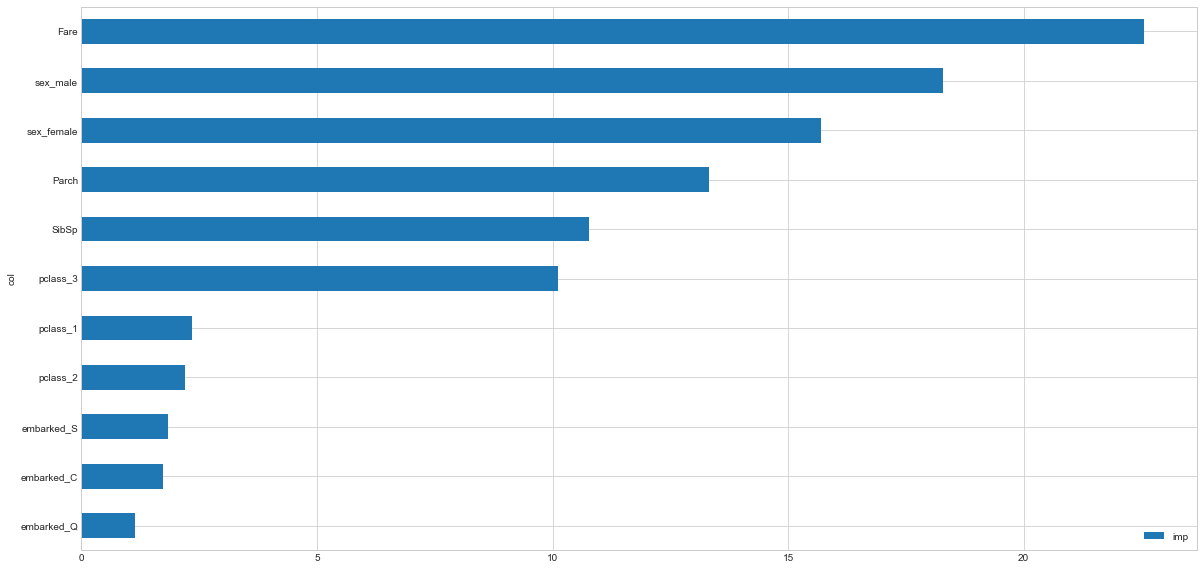

In [540]:
# Plot the feature importance scores
feature_importance(catboost_model, X_train)

Precision and Recall

In [541]:
metrics = ['Precision', 'Recall', 'F1', 'AUC']

eval_metrics = catboost_model.eval_metrics(train_pool,
                                           metrics=metrics,
                                           plot=True)

for metric in metrics:
    print(str(metric)+": {}".format(np.mean(eval_metrics[metric])))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Precision: 0.8509043105250041
Recall: 0.6889176470588236
F1: 0.7613392114120545
AUC: 0.894183183327976


Submission

In [542]:
# We need our dataframe to look like this one
X_train.head()

,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,0,71.2833,1,0,0,1,0,1,0,0
2,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,8.0500,0,0,1,0,1,0,0,1


In [543]:
# Our test dataframe has some columns our model hasn't been trained on
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [544]:
# One hot encode the columns in the test data frame (like X_train)
test_embarked_one_hot = pd.get_dummies(test['Embarked'], 
                                       prefix='embarked')

test_sex_one_hot = pd.get_dummies(test['Sex'], 
                                prefix='sex')

test_plcass_one_hot = pd.get_dummies(test['Pclass'], 
                                   prefix='pclass')

In [545]:
#Combine the test one hot encoded columns with test
test = pd.concat([test,
                 test_embarked_one_hot,
                 test_sex_one_hot,
                 test_plcass_one_hot], axis=1)

In [546]:
#LET'S LOOK AT TEST,
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0,0,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,1,0,0,0,1


In [547]:
# Create a list of columns to be used for the predictions
wanted_test_columns = X_train.columns
wanted_test_columns

Index(['SibSp', 'Parch', 'Fare', 'embarked_C', 'embarked_Q', 'embarked_S',
       'sex_female', 'sex_male', 'pclass_1', 'pclass_2', 'pclass_3'],
      dtype='object')

In [548]:
# Make a prediction using the CatBoost model on the wanted columns
predictions = catboost_model.predict(test[wanted_test_columns])

In [549]:
# Our predictions array is comprised of 0's and 1's (Survived or Did Not Survive)
predictions[:20]

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1.])

In [550]:
#Create a submission dataframe and append the relevant columns
submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']
submission['Survived'] = predictions
submission.head()

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,1.0


In [551]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [553]:
#Let's convert our submission dataframe 'Survived' column to ints
submission['Survived'] = submission['Survived'].astype(int)
print('Converted Survived column to integers.')

Converted Survived column to integers.


In [554]:
#How does our submission dataframe look?
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [555]:
#Are our test and submission dataframes the same length?
if len(submission) == len(test):
    print("Submission dataframe is the same length as test({} rows).".format(len(submission)))
else:
    print("Dataframes mismatched, won't be able to submit to Kaggle.")

Submission dataframe is the same length as test(418 rows).


In [556]:
#Convert submission dataframe to csb for submission to csv
# for Kaggle submission
submission.to_csv("catboost_submission.csv", index = False)
print("Submission CSV is ready")

Submission CSV is ready


In [557]:
#Check the submission csv to make sure it's in the right format
submissions_check = pd.read_csv("catboost_submission.csv")
submissions_check.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
